# Quantum teleportation. 
The notebook below has an example how to transfer a state from alice to bob using measurement and then classical bit transfer.


In [626]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import numpy as np
from IPython.display import display, Math, Latex
%matplotlib inline


In [627]:
# Prepare the Qubit state to be trasferred. 
import math

state_to_be_tranfered = QuantumRegister(1, name="state_to_be_tranfered")
alice_state = QuantumRegister(1, name="alice_state")
bob_state = QuantumRegister(1, name="bob_state")

creg1 = ClassicalRegister(1, name="Creg1")
creg2 = ClassicalRegister(1, name="Creg2")
creg3 = ClassicalRegister(1, name="Creg3")

quantum_teleportation_circuit = QuantumCircuit(state_to_be_tranfered,alice_state ,bob_state, creg1, creg2, creg3)

initial_state = [math.sqrt(1/2),math.sqrt(1/2)]  
quantum_teleportation_circuit.initialize(initial_state, 0)
quantum_teleportation_circuit.barrier()


# Prepare Bell states

In [628]:
def create_bell_states(circuit, bit_1, bit_2):
    circuit.h(bit_1)
    circuit.cx(bit_1, bit_2)
    circuit.barrier(0,1,2, label="#1")


In [629]:
create_bell_states(quantum_teleportation_circuit, 1, 2)

In [630]:
# Alice prepare state for transfer. 

def alice_prepare_transfer(circuit, bit_1, bit_2):
    circuit.cx(bit_2, bit_1)
    circuit.h(bit_2)
    circuit.barrier(0,1,2, label="#2")

def alice_send(circuit, bit_1, bit_2):
    circuit.measure(0,bit_1)
    circuit.measure(1,bit_2)

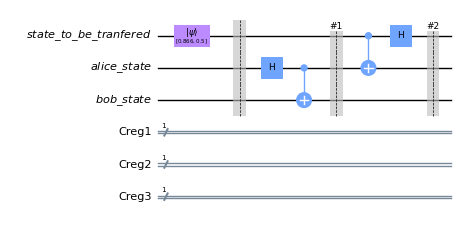

In [631]:
alice_prepare_transfer(quantum_teleportation_circuit, 1, 0)
quantum_teleportation_circuit.draw(output='mpl', scale=0.5)

# Alice measure states

In [632]:
state = Statevector(quantum_teleportation_circuit)
state.draw("latex")



<IPython.core.display.Latex object>

In [633]:
alice_send(quantum_teleportation_circuit, creg1, creg2)

In [634]:
# Bob's functions 

def bob_receive(circuit, qubit, cbit1, cbit2):
    circuit.x(qubit).c_if(cbit2, 1)
    circuit.z(qubit).c_if(cbit1, 1)
    # circuit.h(qubit)
    

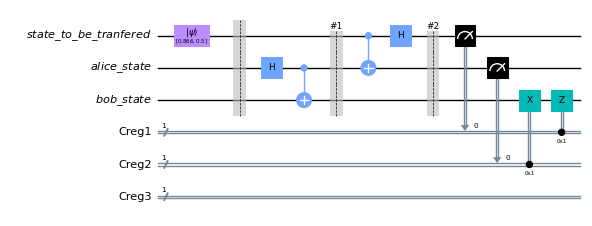

In [635]:
bob_receive(quantum_teleportation_circuit, 2, creg1, creg2)
quantum_teleportation_circuit.draw(output='mpl', scale=0.5)

In [636]:
backend = Aer.get_backend("statevector_simulator")
quantum_teleportation_circuit.save_statevector(label = 'test', pershot = True)
result = execute(quantum_teleportation_circuit, backend = backend, shots = 1).result()
z = Statevector(result.get_statevector())
z.draw("Latex")


<IPython.core.display.Latex object>

The state to be tranfered can be derived as below. 

$ \begin{bmatrix}\frac{\sqrt3}{2} |0 \rangle  + \frac{1}{2} |1 \rangle \end{bmatrix} |01\rangle$ 

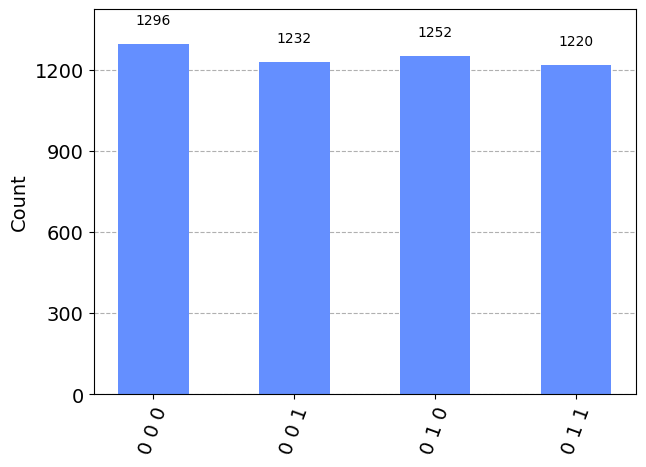

In [637]:
sim = Aer.get_backend('aer_simulator')
job = execute(quantum_teleportation_circuit, sim, shots=5000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Measurement and CNOT operation can be swapped. 
The following example shows that the measurement and conditinal X and Z gates the circuit on bob's qubit need not necessarily maintain order.

In [638]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

initial_state = [math.sqrt(3)/2,1/2]  
circuit.initialize(initial_state, 0)

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.cx(qreg_q[0], qreg_q[2])
circuit.cz(qreg_q[1], qreg_q[2])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])


circuit.draw()


┌─────────────────────────┐ ░            ░      ┌───┐ ░         ┌─┐   
q_0: ┤ Initialize(0.86603,0.5) ├─░────────────░───■──┤ H ├─░───■─────┤M├───
     └─────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░   │     └╥┘┌─┐
q_1: ────────────────────────────░─┤ H ├──■───░─┤ X ├──────░───┼───■──╫─┤M├
                                 ░ └───┘┌─┴─┐ ░ └───┘      ░ ┌─┴─┐ │  ║ └╥┘
q_2: ────────────────────────────░──────┤ X ├─░────────────░─┤ X ├─■──╫──╫─
                                 ░      └───┘ ░            ░ └───┘    ║  ║ 
c: 3/═════════════════════════════════════════════════════════════════╩══╩═
                                                                      0  1

In [639]:
backend = Aer.get_backend("statevector_simulator")
result = execute(circuit, backend = backend, shots = 1).result()
z = Statevector(result.get_statevector())
z.draw("Latex")


<IPython.core.display.Latex object>

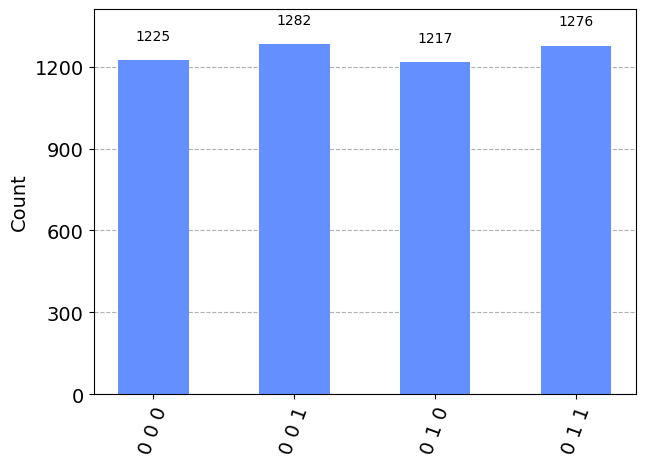

In [640]:
sim = Aer.get_backend('aer_simulator')
job = execute(quantum_teleportation_circuit, sim, shots=5000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)